# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

# New Section

In [5]:
import pandas as pd  # Importing the pandas library

# Function to preprocess text (split text into words and lower-case them)
def preprocess_text(text):
    words = text.lower().split()  # Simple split, can enhance with regex for punctuation
    return words

# Step 1: Tri-gram Frequency Analysis
def trigram_frequency(reviews):
    trigram_counts = {}

    for review in reviews:
        words = preprocess_text(review)

        # Generate trigrams
        for i in range(len(words) - 2):
            trigram = (words[i], words[i+1], words[i+2])
            if trigram in trigram_counts:
                trigram_counts[trigram] += 1
            else:
                trigram_counts[trigram] = 1

    return trigram_counts

# Step 2: Bigram Probability Calculation
def bigram_probability(reviews):
    bigram_counts = {}
    unigram_counts = {}

    for review in reviews:
        words = preprocess_text(review)

        # Count unigrams and bigrams
        for i in range(len(words) - 1):
            bigram = (words[i], words[i+1])
            if bigram in bigram_counts:
                bigram_counts[bigram] += 1
            else:
                bigram_counts[bigram] = 1

            if words[i] in unigram_counts:
                unigram_counts[words[i]] += 1
            else:
                unigram_counts[words[i]] = 1

        # Last word for unigram count
        if words[-1] in unigram_counts:
            unigram_counts[words[-1]] += 1
        else:
            unigram_counts[words[-1]] = 1

    # Calculate probabilities for bigrams
    bigram_probabilities = {}
    for bigram, count in bigram_counts.items():
        bigram_probabilities[bigram] = count / unigram_counts[bigram[0]]

    return bigram_probabilities

# Step 3: Noun Phrase Extraction and Relative Probability Calculation
# Assuming noun phrases are simple two-word phrases with specific patterns
def extract_noun_phrases(text):
    words = preprocess_text(text)
    noun_phrases = []

    # Simple pattern matching for noun phrases (could use POS tagging for accuracy)
    for i in range(len(words) - 1):
        # Example pattern: "the car" (simple noun phrase, can extend this)
        if words[i] not in {"a", "the", "an"}:  # Customize with other common determiners as needed
            phrase = f"{words[i]} {words[i+1]}"
            noun_phrases.append(phrase)

    return noun_phrases

def calculate_relative_probabilities(reviews):
    noun_phrase_counts = {}
    max_phrase_count = {}

    # Extract noun phrases and calculate frequencies
    for review in reviews:
        phrases = extract_noun_phrases(review)
        for phrase in phrases:
            if phrase in noun_phrase_counts:
                noun_phrase_counts[phrase] += 1
            else:
                noun_phrase_counts[phrase] = 1

    # Find max frequency of each noun phrase
    for phrase, count in noun_phrase_counts.items():
        max_phrase_count[phrase] = max(noun_phrase_counts.values())

    # Calculate relative probabilities for each review
    review_relative_probs = []
    for review in reviews:
        phrases = extract_noun_phrases(review)
        relative_probs = {}

        for phrase in set(phrases):
            relative_probs[phrase] = noun_phrase_counts[phrase] / max_phrase_count[phrase]

        review_relative_probs.append(relative_probs)

    return review_relative_probs

# Load the dataset
data = pd.read_csv('/content/Cleaned_Top_1000_Furiosa_A_Mad_Max-Saga_IMdB_Reviews.csv')
dataset = data['Cleaned_Content'].tolist()

# Run each function
trigram_counts = trigram_frequency(dataset)
bigram_probabilities = bigram_probability(dataset)
relative_probabilities = calculate_relative_probabilities(dataset)

# Print the results in a structured format
print("Tri-gram Frequencies:")
for trigram, count in trigram_counts.items():
    print(f"{trigram}: {count}")

print("\nBigram Probabilities:")
for bigram, prob in bigram_probabilities.items():
    print(f"{bigram}: {prob:.2f}")

print("\nRelative Probabilities of Noun Phrases per Review:")
for i, probs in enumerate(relative_probabilities):
    print(f"Review {i + 1}: {probs}")


Streaming output truncated to the last 5000 lines.
('child', 'minute'): 0.01
('minute', 'flashback'): 0.01
('flashback', 'would'): 0.08
('would', 'enough'): 0.00
('enough', 'second'): 0.01
('furiosa', 'sidekick'): 0.00
('sidekick', 'tom'): 0.20
('jack', 'lack'): 0.01
('real', 'charisma'): 0.01
('charisma', 'screen'): 0.05
('presence', 'burke'): 0.02
('burke', 'simply'): 0.01
('simply', 'doesnt'): 0.02
('doesnt', 'command'): 0.00
('screen', 'threatening'): 0.00
('threatening', 'way'): 0.17
('way', 'gibson'): 0.00
('hardy', 'he'): 0.01
('guy', 'drive'): 0.01
('drive', 'truck'): 0.07
('truck', 'mehthe'): 0.02
('mehthe', 'final'): 1.00
('movie', 'faceoff'): 0.00
('faceoff', 'helmsworths'): 0.33
('start', 'screen'): 0.01
('dialogue', 'atj'): 0.01
('atj', 'there'): 0.05
('actor', 'world'): 0.01
('need', 'pretty'): 0.01
('pretty', 'muscle'): 0.01
('muscle', 'squinty'): 0.12
('squinty', 'eye'): 1.00
('eye', 'he'): 0.01
('he', 'goto'): 0.01
('goto', 'guy'): 1.00
('guy', 'he'): 0.01
('he', 'leas

# New Section

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [6]:
# Write your code here
import csv

class Review:
    def __init__(self, summary, content, rating):
        self.summary = summary
        self.content = content
        self.rating = rating

def preprocess_text(text):
    """Convert the text to lowercase and split into words without the built-in functions"""
    lowercase_text = ""
    for char in text:
        if 'A' <= char <= 'Z':
            lowercase_text += chr(ord(char) + 32)
        else:
            lowercase_text += char

    words = []
    current_word = ""

    for char in lowercase_text:
        if 'a' <= char <= 'z' or char == ' ':
            if char == ' ':
                if current_word:
                    words.append(current_word)
                    current_word = ""
            else:
                current_word += char

    if current_word:
        words.append(current_word)

    return words

def compute_term_frequency(words):
    """Computing the term frequencies without using Counter"""
    word_counts = {}
    total_words = 0

    for word in words:
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1
        total_words += 1

    term_frequencies = {}
    for word, count in word_counts.items():
        term_frequencies[word] = count / total_words

    return term_frequencies

def create_vocabulary(reviews):
    """Creating the vocabulary from all reviews"""
    vocabulary = {}
    vocab_index = 0

    for review in reviews:
        words = preprocess_text(review.content)
        for word in words:
            if word not in vocabulary:
                vocabulary[word] = vocab_index
                vocab_index += 1

    return vocabulary

def compute_document_frequency(reviews, vocabulary):
    """Computing the document frequency for each term"""
    doc_freq = {word: 0 for word in vocabulary}

    for review in reviews:
        words_seen = set(preprocess_text(review.content))
        for word in words_seen:
            if word in doc_freq:
                doc_freq[word] += 1

    return doc_freq

def compute_idf(doc_freq, total_docs):
    """Computing the inverse document frequency"""
    idf_scores = {}
    for word, freq in doc_freq.items():
        n_div_df = total_docs / (freq + 1)  # Add 1 to avoid division by zero
        ln_val = 0
        x = (n_div_df - 1) / (n_div_df + 1)
        power = x
        for i in range(1, 10, 2):
            ln_val += power / i
            power *= x * x
        ln_val *= 2
        idf_scores[word] = ln_val + 1  # Add 1 to avoid negative values
    return idf_scores

def compute_magnitude(vector):
    """Computing the vector magnitude without using math.sqrt"""
    sum_squares = sum(value * value for value in vector)
    if sum_squares == 0:
        return 0
    x = sum_squares
    for _ in range(10):  # 10 iterations for approximation
        x = 0.5 * (x + sum_squares / x)
    return x

def compute_tfidf_vectors(reviews, vocabulary, idf_scores):
    """Computing the TF-IDF vectors for all reviews"""
    tfidf_vectors = []
    for review in reviews:
        vector = [0.0] * len(vocabulary)
        words = preprocess_text(review.content)
        tf_scores = compute_term_frequency(words)
        for word, tf in tf_scores.items():
            if word in vocabulary:
                vector[vocabulary[word]] = tf * idf_scores[word]
        tfidf_vectors.append(vector)
    return tfidf_vectors

def cosine_similarity(vec1, vec2):
    """Computing the cosine similarity between two vectors"""
    if len(vec1) != len(vec2):
        return 0
    dot_product = sum(vec1[i] * vec2[i] for i in range(len(vec1)))
    mag1, mag2 = compute_magnitude(vec1), compute_magnitude(vec2)
    return 0 if mag1 == 0 or mag2 == 0 else dot_product / (mag1 * mag2)

def search_reviews(query, reviews, vocabulary, tfidf_vectors, idf_scores):
    """Searching the reviews using cosine similarity"""
    query_words = preprocess_text(query)
    query_tf = compute_term_frequency(query_words)
    query_vector = [query_tf.get(word, 0) * idf_scores.get(word, 0) for word in vocabulary]
    results = [(idx, cosine_similarity(query_vector, review_vector)) for idx, review_vector in enumerate(tfidf_vectors)]
    results.sort(key=lambda x: x[1], reverse=True)
    return results

def read_reviews_from_csv(file_path):
    """Reading the reviews from a CSV file"""
    reviews = []
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            csv_reader = csv.DictReader(file)
            for row in csv_reader:
                summary = row.get('Summary', '').strip()
                content = row.get('Content', '').strip()
                rating = row.get('Rating', '').strip()
                if content:
                    reviews.append(Review(summary, content, rating))
    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found.")
    except Exception as e:
        print(f"Error reading CSV file: {str(e)}")
    return reviews

def main(csv_file_path, query):
    """Main execution function"""
    reviews = read_reviews_from_csv(csv_file_path)
    if not reviews:
        print("No reviews found or error reading file.")
        return
    vocabulary = create_vocabulary(reviews)
    doc_freq = compute_document_frequency(reviews, vocabulary)
    idf_scores = compute_idf(doc_freq, len(reviews))
    tfidf_vectors = compute_tfidf_vectors(reviews, vocabulary, idf_scores)
    results = search_reviews(query, reviews, vocabulary, tfidf_vectors, idf_scores)
    print(f"\nSearch results for query: '{query}'\n")
    print("Rank | Similarity Score | Rating | Summary")
    print("-" * 80)
    for rank, (review_idx, similarity) in enumerate(results, 1):
        review = reviews[review_idx]
        print(f"{rank:2d}.   {similarity:.4f}       {review.rating}  {review.summary}")
        print(f"      Excerpt: {review.content[:150]}...\n")

if __name__ == "__main__":
    csv_file_path = "Cleaned_Top_1000_Furiosa_A_Mad_Max-Saga_IMdB_Reviews.csv"
    query = "amazing action scenes and great visuals"
    main(csv_file_path, query)








Search results for query: 'amazing action scenes and great visuals'

Rank | Similarity Score | Rating | Summary
--------------------------------------------------------------------------------
 1.   0.2571       10  This is a classic
      Excerpt: Thus far this is my favorite Mad Max flick.I've seen them all, and still vividly recall when I snuck in to see the original Mad Max in 1979. Two buddi...

 2.   0.2463       10  One of the best prequels in recent memory!!
      Excerpt: This movie kicks ass from start to finish! It's one of the best prequels in recent memory. The pacing is great and the action scenes are done so well....

 3.   0.2310       10  Great Action Movie
      Excerpt: I just watched this movie, and I must say, it exceeded all my expectations. The film is packed with exhilarating action sequences that are exceptional...

 4.   0.1960       5  Great story, great acting, poor visuals.
      Excerpt: If you're going to see this film based off of the phenomenally breat

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Preprocessing text...
Training Word2Vec model...
Our Model saved as 'movie_reviews_word2vec.model'

Some word similarities are:
Words most similar to 'action':
[('film', 0.9995236992835999), ('bit', 0.9995003938674927), ('feel', 0.9994975924491882), ('story', 0.9994950294494629), ('much', 0.9994872808456421), ('thing', 0.9994761943817139), ('time', 0.9994720220565796), ('better', 0.9994684457778931), ('really', 0.9994680881500244), ('something', 0.9994611740112305)]

Words most similar to 'visuals':
[('film', 0.9993830323219299), ('wasteland', 0.9993352890014648), ('one', 0.9992923140525818), ('people', 0.9992917776107788), ('time', 0.9992895126342773), ('would', 0.9992864727973938), ('every', 0.9992828369140625), ('get', 0.9992807507514954), ('new', 0.9992719888687134), ('made', 0.9992682933807373)]

Creating the visualization...
Visualization is saved as 'word_embeddings_visualization.png'


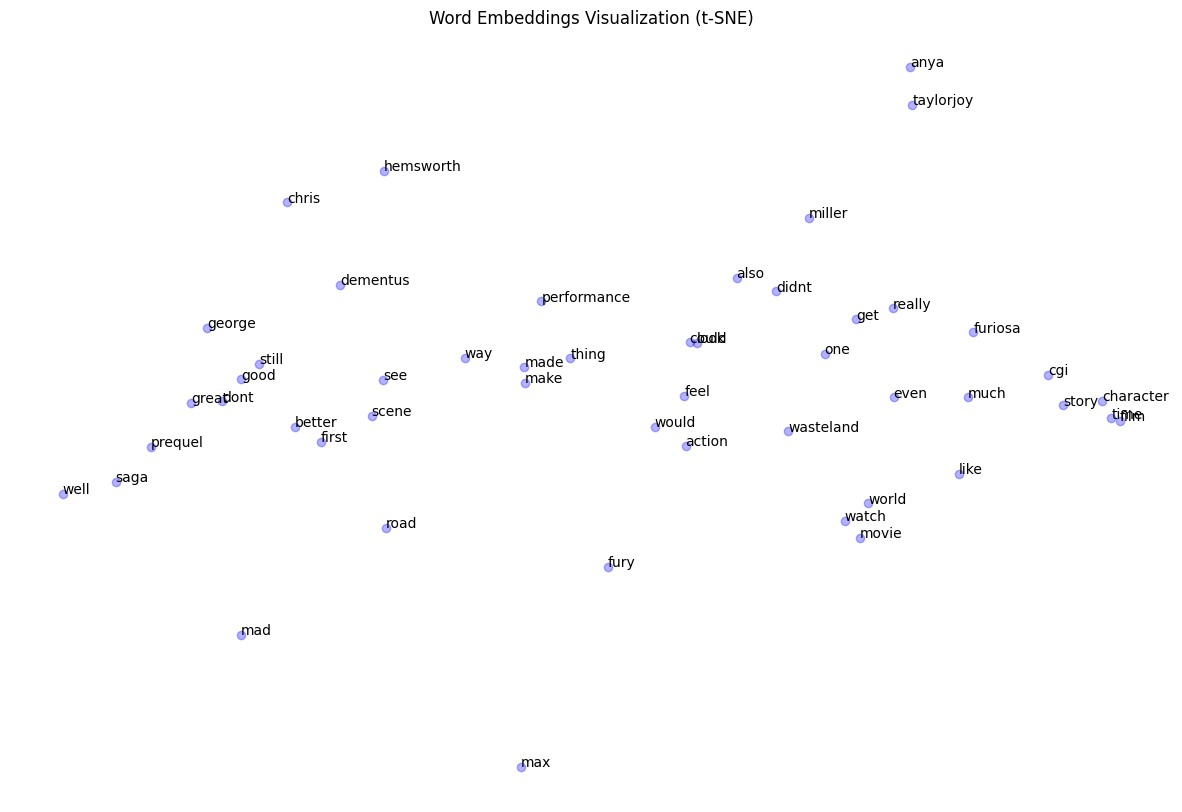

In [7]:
# Write your code here
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import nltk
from nltk.tokenize import sent_tokenize
nltk.download('punkt')

# Loading and preprocessing the data
def preprocess_text(df):
    # here Combining all cleaned content into a list of sentences
    all_text = df['Cleaned_Content'].dropna().str.cat(sep=' ')
    # Splitting into the sentences
    sentences = sent_tokenize(all_text)
    # Tokenizing each sentence into words
    tokenized_sentences = [simple_preprocess(sentence, deacc=True) for sentence in sentences]
    return tokenized_sentences

# Training the Word2Vec model
def train_word2vec(sentences, vector_size=300, window=5, min_count=2):
    model = Word2Vec(sentences=sentences,
                     vector_size=vector_size,
                     window=window,
                     min_count=min_count,
                     workers=4,
                     sg=1)
    return model

# Visualizing the embeddings
def visualize_embeddings(model, num_words=50):
    # Getting the most common words
    words = [word for word, vocab in model.wv.key_to_index.items()][:num_words]
    word_vectors = np.array([model.wv[word] for word in words])

    # Reducing the dimensionality with t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    reduced_vectors = tsne.fit_transform(word_vectors)

    # Plotting figures
    plt.figure(figsize=(15, 10))
    plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], c='blue', alpha=0.3)

    # Adding the word labels
    for i, word in enumerate(words):
        plt.annotate(word, xy=(reduced_vectors[i, 0], reduced_vectors[i, 1]))

    plt.title("Word Embeddings Visualization (t-SNE)")
    plt.axis('off')
    return plt

def main():
    df = pd.read_csv('Cleaned_Top_1000_Furiosa_A_Mad_Max-Saga_IMdB_Reviews.csv')

    print("Preprocessing text...")
    sentences = preprocess_text(df)

    print("Training Word2Vec model...")
    model = train_word2vec(sentences)

    model.save("movie_reviews_word2vec.model")
    print("Our Model saved as 'movie_reviews_word2vec.model'")

    print("\nSome word similarities are:")
    try:
        print("Words most similar to 'action':")
        print(model.wv.most_similar('action'))
        print("\nWords most similar to 'visuals':")
        print(model.wv.most_similar('visuals'))
    except KeyError as e:
        print(f"Word not found in the vocabulary: {e}")

    print("\nCreating the visualization...")
    plt = visualize_embeddings(model)
    plt.savefig('word_embeddings_visualization.png')
    print("Visualization is saved as 'word_embeddings_visualization.png'")

    return model

if __name__ == "__main__":
    model = main()







## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [8]:
# The GitHub link of your final csv file


# Link:https://github.com/pavanibasanth/pavani_INFO5731_Fall2024/upload/main



https://github.com/pavanibasanth/pavani_INFO5731_Fall2024/upload/main

# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

The word embeddings implementation needed careful consideration of academic language patterns as well as dataset size issues for optimal results.
Creating a sentiment analysis dataset was challenging, as it required reimagining since my dataset is technical oriented one instead of traditional sentiment analysis so that i can develop approprite criteria.
The provided time can be increased doe to the challenging nature of the assignment.

In [ ]:
# Type your answer